#### Import of Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [6]:
df = pd.read_csv('datatest.csv')
#df=df.head(3000)
df=df.drop(columns=["id","date"])

In [7]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [8]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB
Number of duplicated rows is:  82
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

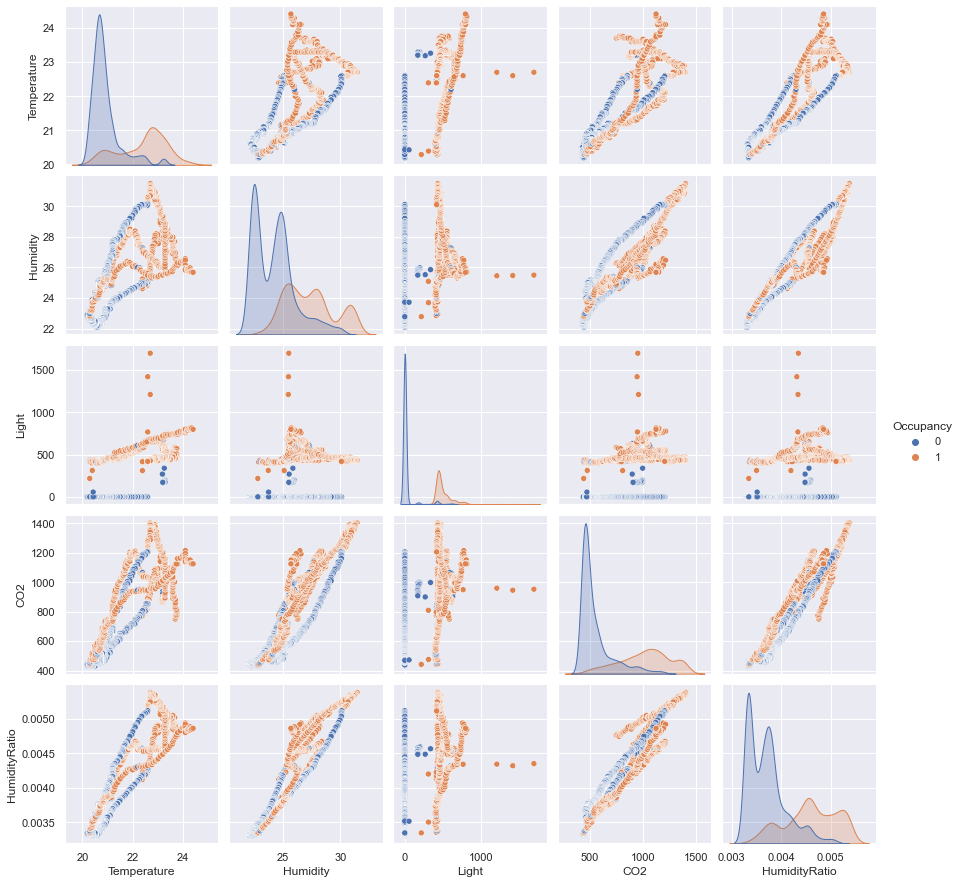

In [9]:
sns.pairplot(df, hue='Occupancy')
plt.show()

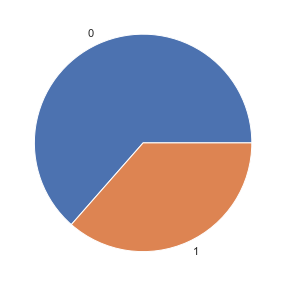

In [10]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [11]:
X = df.drop(columns=['Occupancy'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,2665.0,21.433876,1.028024,20.200000,20.650000,20.890000,22.356667,24.408333
Humidity,2665.0,25.353937,2.436842,22.100000,23.260000,25.000000,26.856667,31.472500
Light,2665.0,193.227556,250.210906,0.000000,0.000000,0.000000,442.500000,1697.250000
CO2,2665.0,717.906470,292.681718,427.500000,466.000000,580.500000,956.333333,1402.250000
HumidityRatio,2665.0,0.004027,0.000611,0.003303,0.003529,0.003815,0.004532,0.005378


#### Standardize the Data

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,2665.0,1.738363e-15,1.000188,-1.200466,-0.762651,-0.529149,0.897803,2.893916
Humidity,2665.0,-1.023821e-15,1.000188,-1.335559,-0.859444,-0.145271,0.616787,2.511328
Light,2665.0,-3.199442e-17,1.000188,-0.772404,-0.772404,-0.772404,0.996436,6.012147
CO2,2665.0,-4.265923e-17,1.000188,-0.992412,-0.860846,-0.469562,0.814781,2.338622
HumidityRatio,2665.0,-4.905811e-16,1.000188,-1.185496,-0.815009,-0.347182,0.826469,2.212680


#### Observations and Variables

In [13]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

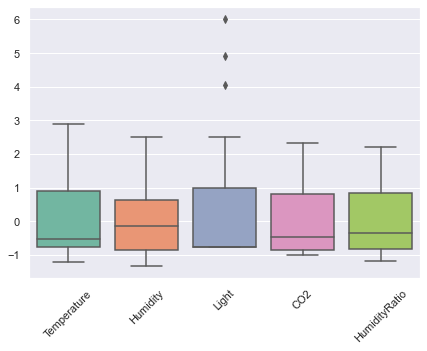

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

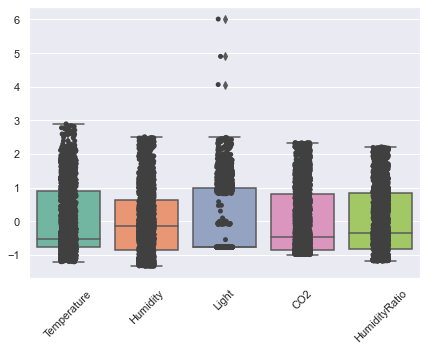

In [15]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

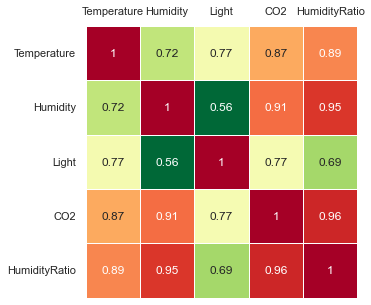

In [16]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [17]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [18]:
out['PC']

,PC1,PC2
0,2.393796,1.183934
1,2.418970,1.156295
2,2.413574,1.155220
3,2.258606,0.945017
4,2.302363,0.908998
...,...,...
2660,3.601424,1.966538
2661,3.608329,1.972136
2662,3.602353,2.005934
2663,3.609167,1.997557


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (85.1% expl.var)', ylabel='PC2 (10.1% expl.var)'>)

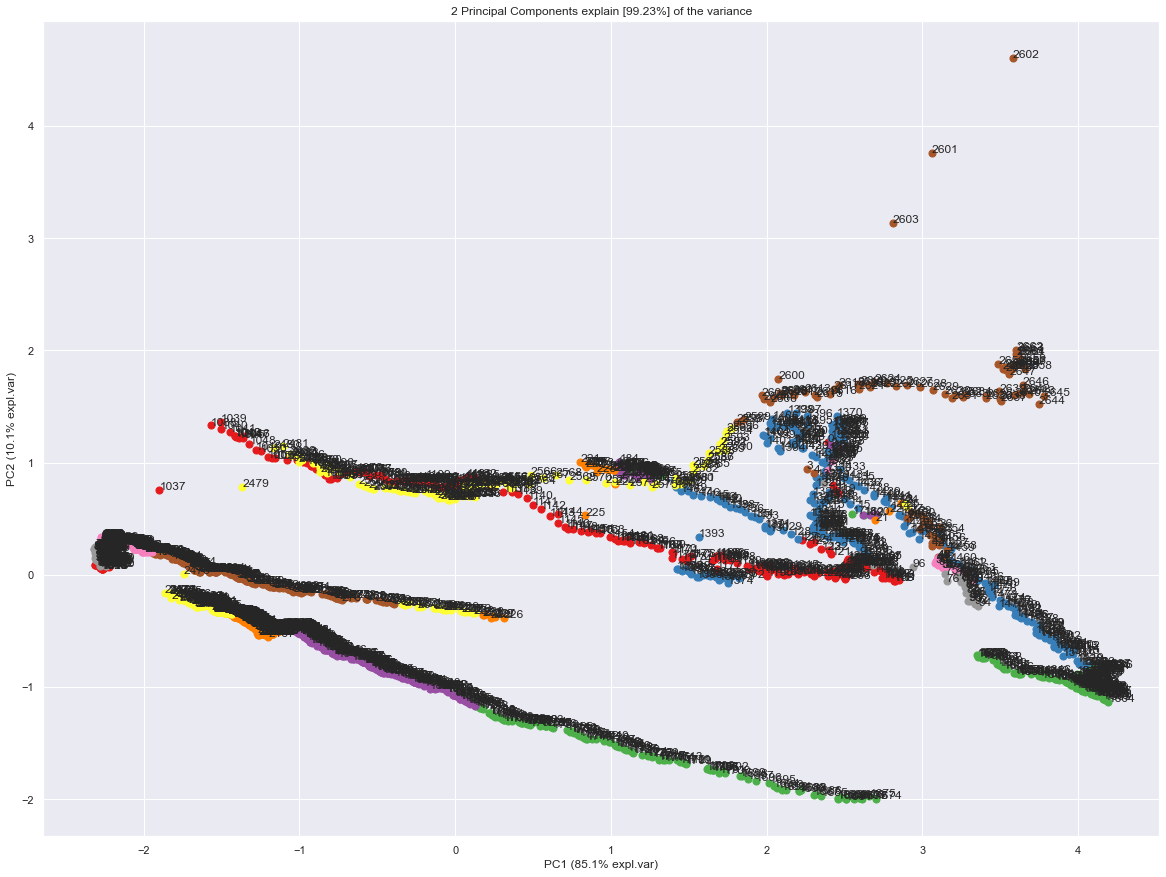

In [19]:
model.scatter(label=True, legend=False)

Eigenvectors

In [20]:
A = out['loadings'].T

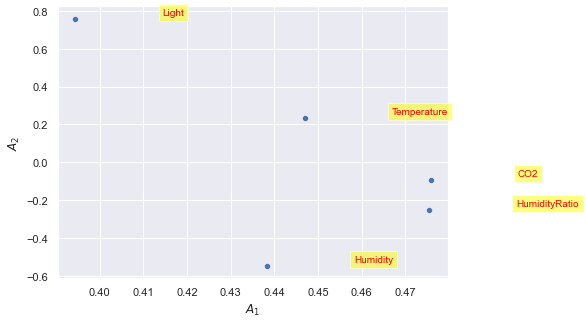

In [21]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

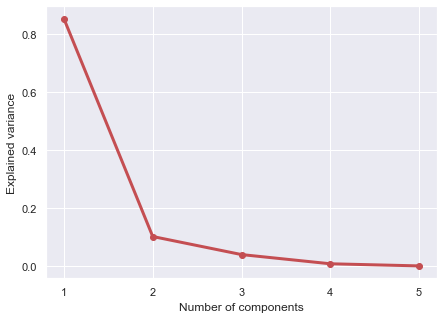

In [22]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

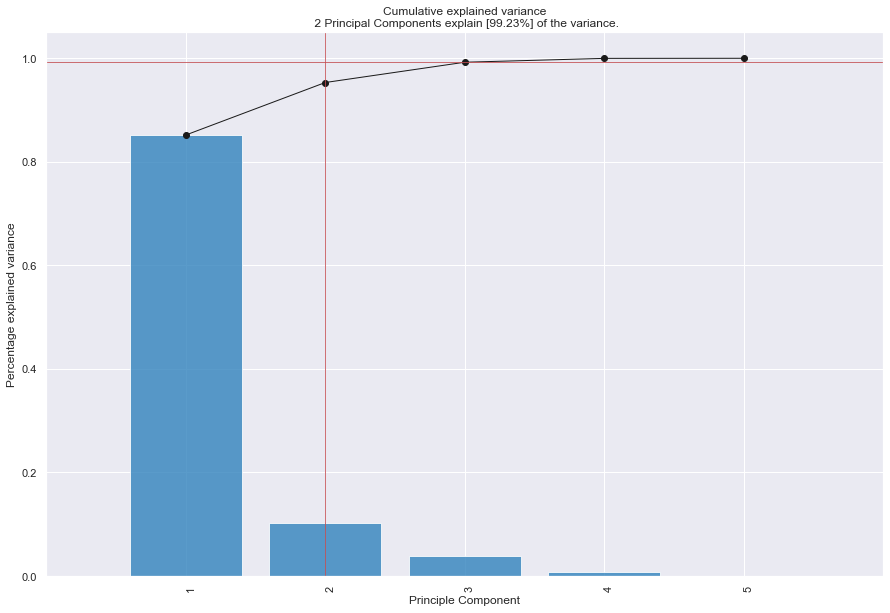

<Figure size 504x360 with 0 Axes>

In [23]:
model.plot();

BiPlot

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
#model.biplot3d(legend=False)

Classification

In [24]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2398, 6)
Unseen Data For Predictions: (267, 6)


In [25]:
from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Occupancy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2398, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9863,0.9984,0.9866,0.9756,0.9809,0.9702,0.9705,0.2490
lightgbm,Light Gradient Boosting Machine,0.9821,0.9962,0.9833,0.9678,0.9753,0.9613,0.9616,0.0600
knn,K Neighbors Classifier,0.9809,0.9958,0.9850,0.9630,0.9737,0.9588,0.9591,0.9420
rf,Random Forest Classifier,0.9809,0.9976,0.9850,0.9630,0.9737,0.9588,0.9591,0.2160
gbc,Gradient Boosting Classifier,0.9803,0.9967,0.9883,0.9588,0.9731,0.9576,0.9582,0.1140
dt,Decision Tree Classifier,0.9797,0.9794,0.9782,0.9661,0.9719,0.9561,0.9564,0.0150
ada,Ada Boost Classifier,0.9774,0.9941,0.9766,0.9614,0.9687,0.9510,0.9513,0.0770
lr,Logistic Regression,0.9744,0.9908,0.9983,0.9351,0.9655,0.9451,0.9467,1.7030
lda,Linear Discriminant Analysis,0.9744,0.9898,0.9983,0.9351,0.9655,0.9451,0.9467,0.0210
ridge,Ridge Classifier,0.9738,0.0000,0.9983,0.9337,0.9647,0.9439,0.9455,0.0150


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Classifiers